<a href="https://colab.research.google.com/github/jaemoi/sturdy-happiness/blob/main/%EB%B9%99%ED%95%98_%EB%B2%94%EC%9C%84_%EC%98%88%EC%B8%A1_%EC%97%B0%EC%8A%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2016년 월별 빙하량을 예측해보겠습니다.

주어진 데이터:

year: 년도 (int64)

month: 달 (int64)

car_reg: 자동차 등록 수 (float64)

cow: 세계 소의 마릿 수 (float64)

gdp_:평균적인 GDP 양 (float64)

Carbon: 탄소 방출량(선형성을 띄는 수치, 계절성을 제거한 수(float64)

seaice_extent: 해빙크기(float64)

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go

#sklearn - 머신러닝 분석을 위한 객체
from sklearn.preprocessing import MinMaxScaler
#cross_val_score : cross_validate - 다중평가지표 - 모델을 평가할 때 여러개의 지표를 이용할 수 있다는 뜻
from sklearn.model_selection import cross_val_score


from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
#!pip install lightgbm
from lightgbm import LGBMRegressor

In [2]:
submission = pd.read_csv("seaice_sample.csv")

In [3]:
test = pd.read_csv("seaice_test.csv")

In [4]:
train = pd.read_csv('seaice_train.csv')

In [5]:
train

,year,month,car_reg,cow,gdp_,Carbon,seaice_extent
0,1978,11,47.000,1.211070e+14,7.214118e+06,333.99,11.645133
1,1978,12,48.000,1.211070e+14,7.618305e+06,335.26,13.605867
2,1979,1,49.000,1.211070e+09,8.022491e+06,336.22,15.414000
3,1979,2,49.275,1.211565e+09,8.092499e+06,336.96,16.175286
4,1979,3,49.550,1.212061e+09,8.162507e+06,337.80,16.341938
...,...,...,...,...,...,...,...
470,2019,1,2368.000,1.496833e+09,6.293426e+07,NaN,13.555677
471,2019,2,2370.300,1.496643e+09,6.307988e+07,NaN,14.398357
472,2019,3,2372.600,1.496452e+09,6.322549e+07,NaN,14.551968
473,2019,4,2374.900,1.496262e+09,6.337111e+07,NaN,13.454600


In [6]:
train_original = train.copy()

In [7]:
train_original

,year,month,car_reg,cow,gdp_,Carbon,seaice_extent
0,1978,11,47.000,1.211070e+14,7.214118e+06,333.99,11.645133
1,1978,12,48.000,1.211070e+14,7.618305e+06,335.26,13.605867
2,1979,1,49.000,1.211070e+09,8.022491e+06,336.22,15.414000
3,1979,2,49.275,1.211565e+09,8.092499e+06,336.96,16.175286
4,1979,3,49.550,1.212061e+09,8.162507e+06,337.80,16.341938
...,...,...,...,...,...,...,...
470,2019,1,2368.000,1.496833e+09,6.293426e+07,NaN,13.555677
471,2019,2,2370.300,1.496643e+09,6.307988e+07,NaN,14.398357
472,2019,3,2372.600,1.496452e+09,6.322549e+07,NaN,14.551968
473,2019,4,2374.900,1.496262e+09,6.337111e+07,NaN,13.454600


In [8]:
train

,year,month,car_reg,cow,gdp_,Carbon,seaice_extent
0,1978,11,47.000,1.211070e+14,7.214118e+06,333.99,11.645133
1,1978,12,48.000,1.211070e+14,7.618305e+06,335.26,13.605867
2,1979,1,49.000,1.211070e+09,8.022491e+06,336.22,15.414000
3,1979,2,49.275,1.211565e+09,8.092499e+06,336.96,16.175286
4,1979,3,49.550,1.212061e+09,8.162507e+06,337.80,16.341938
...,...,...,...,...,...,...,...
470,2019,1,2368.000,1.496833e+09,6.293426e+07,NaN,13.555677
471,2019,2,2370.300,1.496643e+09,6.307988e+07,NaN,14.398357
472,2019,3,2372.600,1.496452e+09,6.322549e+07,NaN,14.551968
473,2019,4,2374.900,1.496262e+09,6.337111e+07,NaN,13.454600


In [9]:
train.describe()

,year,month,car_reg,cow,gdp_,Carbon,seaice_extent
count,475.000000,475.000000,475.000000,4.750000e+02,4.750000e+02,447.000000,475.000000
mean,1998.187368,6.484211,1064.465684,5.112599e+11,3.012370e+07,366.170872,11.521250
std,11.545208,3.467338,752.226653,7.850079e+12,1.556723e+07,18.978537,3.195341
min,1978.000000,1.000000,47.000000,1.211070e+09,7.214118e+06,333.990000,3.565600
25%,1988.000000,3.000000,248.270835,1.287053e+09,1.672304e+07,350.195000,8.807516
50%,1998.000000,6.000000,1087.483330,1.322577e+09,2.708354e+07,364.030000,12.185733
75%,2008.000000,9.500000,1703.337500,1.411353e+09,4.296344e+07,382.195000,14.363421
max,2019.000000,12.000000,2377.200000,1.211070e+14,6.351673e+07,405.870000,16.341938


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           475 non-null    int64  
 1   month          475 non-null    int64  
 2   car_reg        475 non-null    float64
 3   cow            475 non-null    float64
 4   gdp_           475 non-null    float64
 5   Carbon         447 non-null    float64
 6   seaice_extent  475 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 26.1 KB


In [11]:
train.isnull().sum()/len(train)

year             0.000000
month            0.000000
car_reg          0.000000
cow              0.000000
gdp_             0.000000
Carbon           0.058947
seaice_extent    0.000000
dtype: float64

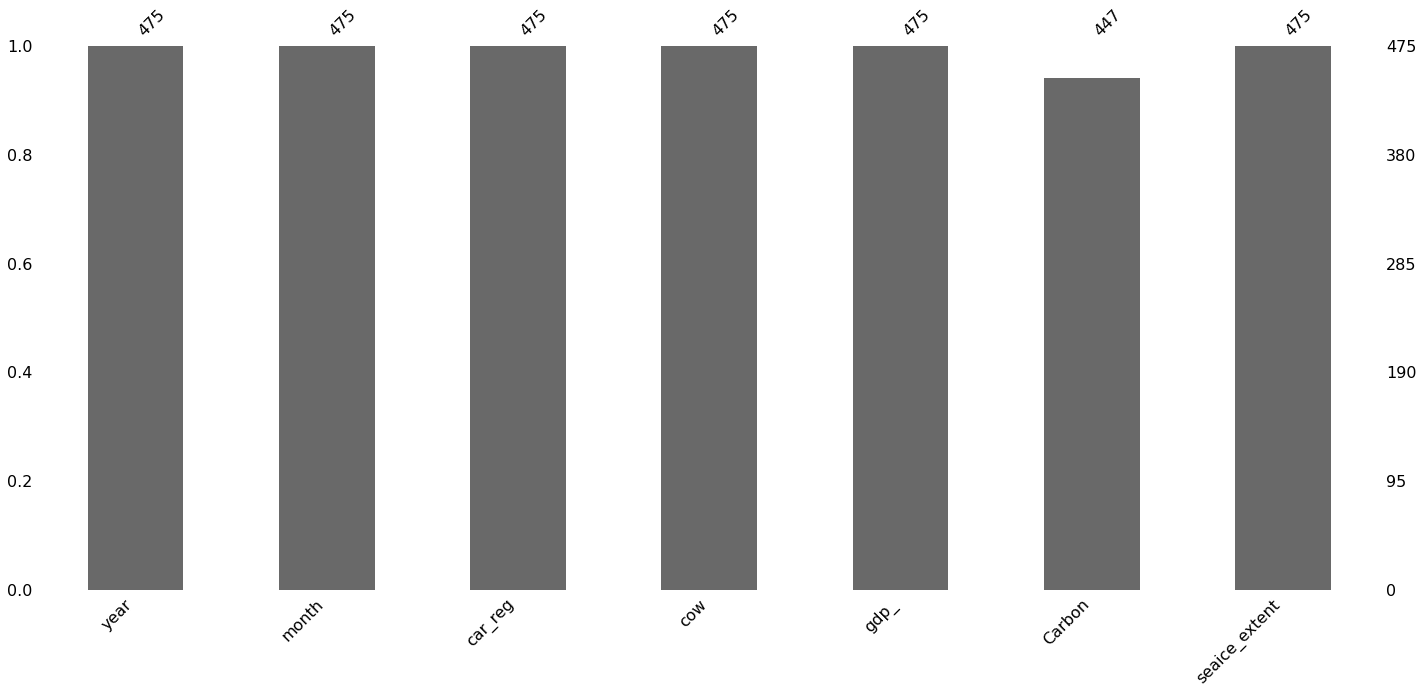

In [12]:
import missingno as msno
#sno.bar는 각 컬럼의 null이 아닌 데이터의 비율을 그래프로 그려주는 패키지
msno.bar(train)

In [13]:
Cor_df = train['Carbon'].mean()

In [14]:
Cor_df

366.1708724832216

In [15]:
train.fillna(Cor_df, inplace=True)

In [16]:
train

,year,month,car_reg,cow,gdp_,Carbon,seaice_extent
0,1978,11,47.000,1.211070e+14,7.214118e+06,333.990000,11.645133
1,1978,12,48.000,1.211070e+14,7.618305e+06,335.260000,13.605867
2,1979,1,49.000,1.211070e+09,8.022491e+06,336.220000,15.414000
3,1979,2,49.275,1.211565e+09,8.092499e+06,336.960000,16.175286
4,1979,3,49.550,1.212061e+09,8.162507e+06,337.800000,16.341938
...,...,...,...,...,...,...,...
470,2019,1,2368.000,1.496833e+09,6.293426e+07,366.170872,13.555677
471,2019,2,2370.300,1.496643e+09,6.307988e+07,366.170872,14.398357
472,2019,3,2372.600,1.496452e+09,6.322549e+07,366.170872,14.551968
473,2019,4,2374.900,1.496262e+09,6.337111e+07,366.170872,13.454600


In [17]:
train["day"] = 10

In [18]:
train

,year,month,car_reg,cow,gdp_,Carbon,seaice_extent,day
0,1978,11,47.000,1.211070e+14,7.214118e+06,333.990000,11.645133,10
1,1978,12,48.000,1.211070e+14,7.618305e+06,335.260000,13.605867,10
2,1979,1,49.000,1.211070e+09,8.022491e+06,336.220000,15.414000,10
3,1979,2,49.275,1.211565e+09,8.092499e+06,336.960000,16.175286,10
4,1979,3,49.550,1.212061e+09,8.162507e+06,337.800000,16.341938,10
...,...,...,...,...,...,...,...,...
470,2019,1,2368.000,1.496833e+09,6.293426e+07,366.170872,13.555677,10
471,2019,2,2370.300,1.496643e+09,6.307988e+07,366.170872,14.398357,10
472,2019,3,2372.600,1.496452e+09,6.322549e+07,366.170872,14.551968,10
473,2019,4,2374.900,1.496262e+09,6.337111e+07,366.170872,13.454600,10


In [19]:
train = train[['year','month','day','car_reg','cow','gdp_','Carbon','seaice_extent']]

In [20]:
train

,year,month,day,car_reg,cow,gdp_,Carbon,seaice_extent
0,1978,11,10,47.000,1.211070e+14,7.214118e+06,333.990000,11.645133
1,1978,12,10,48.000,1.211070e+14,7.618305e+06,335.260000,13.605867
2,1979,1,10,49.000,1.211070e+09,8.022491e+06,336.220000,15.414000
3,1979,2,10,49.275,1.211565e+09,8.092499e+06,336.960000,16.175286
4,1979,3,10,49.550,1.212061e+09,8.162507e+06,337.800000,16.341938
...,...,...,...,...,...,...,...,...
470,2019,1,10,2368.000,1.496833e+09,6.293426e+07,366.170872,13.555677
471,2019,2,10,2370.300,1.496643e+09,6.307988e+07,366.170872,14.398357
472,2019,3,10,2372.600,1.496452e+09,6.322549e+07,366.170872,14.551968
473,2019,4,10,2374.900,1.496262e+09,6.337111e+07,366.170872,13.454600


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           475 non-null    int64  
 1   month          475 non-null    int64  
 2   day            475 non-null    int64  
 3   car_reg        475 non-null    float64
 4   cow            475 non-null    float64
 5   gdp_           475 non-null    float64
 6   Carbon         475 non-null    float64
 7   seaice_extent  475 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 29.8 KB


In [22]:
train['Date'] = pd.to_datetime(train['year'].astype(str) + train['month'].astype(str) + train['day'].astype(str), format='%Y%m%d')
train.drop(['year','month','day'],axis=1, inplace=True)

In [23]:
#train['date'] = pd.to_datetime(train[['year','month','day']])

In [24]:
train

,car_reg,cow,gdp_,Carbon,seaice_extent,Date
0,47.000,1.211070e+14,7.214118e+06,333.990000,11.645133,1978-11-10
1,48.000,1.211070e+14,7.618305e+06,335.260000,13.605867,1978-12-10
2,49.000,1.211070e+09,8.022491e+06,336.220000,15.414000,1979-01-10
3,49.275,1.211565e+09,8.092499e+06,336.960000,16.175286,1979-02-10
4,49.550,1.212061e+09,8.162507e+06,337.800000,16.341938,1979-03-10
...,...,...,...,...,...,...
470,2368.000,1.496833e+09,6.293426e+07,366.170872,13.555677,2019-01-10
471,2370.300,1.496643e+09,6.307988e+07,366.170872,14.398357,2019-02-10
472,2372.600,1.496452e+09,6.322549e+07,366.170872,14.551968,2019-03-10
473,2374.900,1.496262e+09,6.337111e+07,366.170872,13.454600,2019-04-10


In [25]:
train = train[['Date','car_reg','cow','gdp_','Carbon','seaice_extent']]

In [26]:
train

,Date,car_reg,cow,gdp_,Carbon,seaice_extent
0,1978-11-10,47.000,1.211070e+14,7.214118e+06,333.990000,11.645133
1,1978-12-10,48.000,1.211070e+14,7.618305e+06,335.260000,13.605867
2,1979-01-10,49.000,1.211070e+09,8.022491e+06,336.220000,15.414000
3,1979-02-10,49.275,1.211565e+09,8.092499e+06,336.960000,16.175286
4,1979-03-10,49.550,1.212061e+09,8.162507e+06,337.800000,16.341938
...,...,...,...,...,...,...
470,2019-01-10,2368.000,1.496833e+09,6.293426e+07,366.170872,13.555677
471,2019-02-10,2370.300,1.496643e+09,6.307988e+07,366.170872,14.398357
472,2019-03-10,2372.600,1.496452e+09,6.322549e+07,366.170872,14.551968
473,2019-04-10,2374.900,1.496262e+09,6.337111e+07,366.170872,13.454600


In [27]:
test

,year,month,car_reg,cow,gdp_,Carbon
0,2016,1,2180.00000,1468399225,55864273.29,402.82
1,2016,2,2186.04167,1468806550,56080090.40,403.84
2,2016,3,2192.08333,1469213875,56295907.52,404.98
3,2016,4,2198.12500,1469621201,56511724.63,406.51
4,2016,5,2204.16667,1470028526,56727541.75,407.28
5,2016,6,2210.20833,1470435851,56943358.86,406.66
6,2016,7,2216.25000,1470843176,57159175.98,405.14
7,2016,8,2222.29167,1471250501,57374993.09,403.02
8,2016,9,2228.33333,1471657826,57590810.20,401.33
9,2016,10,2234.37500,1472065152,57806627.32,401.48


In [28]:
test['day']=10

In [29]:
test['Date'] = pd.to_datetime(test['year'].astype(str) + test['month'].astype(str) + test['day'].astype(str), format='%Y%m%d')

In [30]:
test.drop(['year','month','day'], axis = 1, inplace = True)

In [31]:
test

,car_reg,cow,gdp_,Carbon,Date
0,2180.00000,1468399225,55864273.29,402.82,2016-01-10
1,2186.04167,1468806550,56080090.40,403.84,2016-02-10
2,2192.08333,1469213875,56295907.52,404.98,2016-03-10
3,2198.12500,1469621201,56511724.63,406.51,2016-04-10
4,2204.16667,1470028526,56727541.75,407.28,2016-05-10
5,2210.20833,1470435851,56943358.86,406.66,2016-06-10
6,2216.25000,1470843176,57159175.98,405.14,2016-07-10
7,2222.29167,1471250501,57374993.09,403.02,2016-08-10
8,2228.33333,1471657826,57590810.20,401.33,2016-09-10
9,2234.37500,1472065152,57806627.32,401.48,2016-10-10


In [32]:
test = test[['Date','car_reg','cow','gdp_','Carbon']]

In [33]:
test

,Date,car_reg,cow,gdp_,Carbon
0,2016-01-10,2180.00000,1468399225,55864273.29,402.82
1,2016-02-10,2186.04167,1468806550,56080090.40,403.84
2,2016-03-10,2192.08333,1469213875,56295907.52,404.98
3,2016-04-10,2198.12500,1469621201,56511724.63,406.51
4,2016-05-10,2204.16667,1470028526,56727541.75,407.28
5,2016-06-10,2210.20833,1470435851,56943358.86,406.66
6,2016-07-10,2216.25000,1470843176,57159175.98,405.14
7,2016-08-10,2222.29167,1471250501,57374993.09,403.02
8,2016-09-10,2228.33333,1471657826,57590810.20,401.33
9,2016-10-10,2234.37500,1472065152,57806627.32,401.48


In [34]:
train

,Date,car_reg,cow,gdp_,Carbon,seaice_extent
0,1978-11-10,47.000,1.211070e+14,7.214118e+06,333.990000,11.645133
1,1978-12-10,48.000,1.211070e+14,7.618305e+06,335.260000,13.605867
2,1979-01-10,49.000,1.211070e+09,8.022491e+06,336.220000,15.414000
3,1979-02-10,49.275,1.211565e+09,8.092499e+06,336.960000,16.175286
4,1979-03-10,49.550,1.212061e+09,8.162507e+06,337.800000,16.341938
...,...,...,...,...,...,...
470,2019-01-10,2368.000,1.496833e+09,6.293426e+07,366.170872,13.555677
471,2019-02-10,2370.300,1.496643e+09,6.307988e+07,366.170872,14.398357
472,2019-03-10,2372.600,1.496452e+09,6.322549e+07,366.170872,14.551968
473,2019-04-10,2374.900,1.496262e+09,6.337111e+07,366.170872,13.454600


In [35]:
#시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'ice trend')

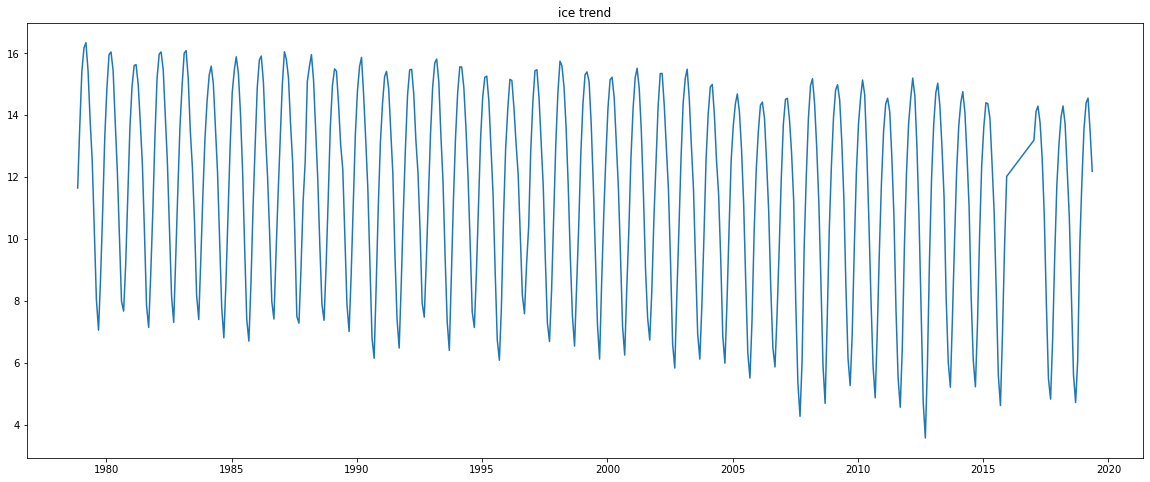

In [36]:
#seaice_extent 컬럼(해빙면적)을 그래프로 그림
plt.figure(figsize=(20,8))
plt.plot(train['Date'], train['seaice_extent'])
plt.title('ice trend')

<Figure size 432x288 with 0 Axes>

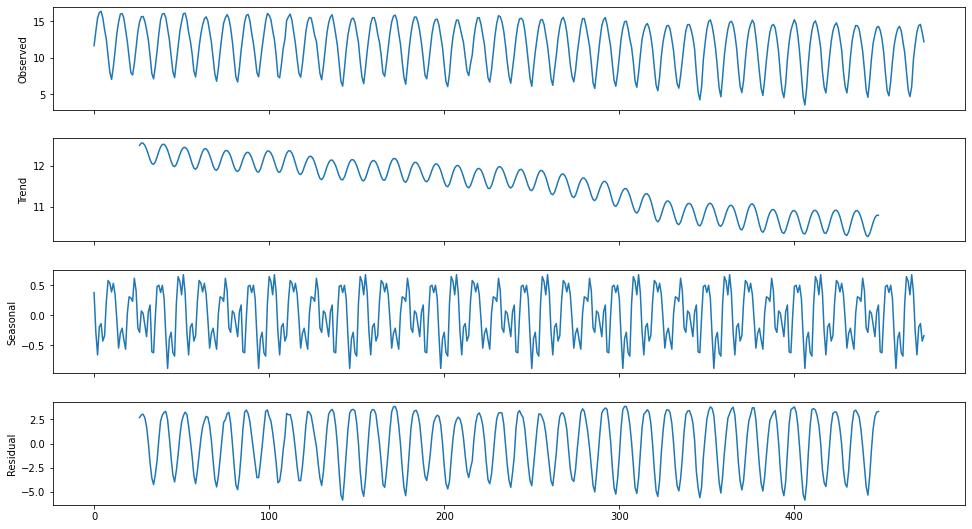

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
#seaice_extent 컬럼이 Seasonal 특성을 갖는지 분석
trend = train[['Date','seaice_extent']]
decomposition = seasonal_decompose(trend['seaice_extent'], freq = 52)

fig_season = plt.figure()
fig_season = decomposition.plot()
fig_season.set_size_inches(15,8)

In [38]:
train

,Date,car_reg,cow,gdp_,Carbon,seaice_extent
0,1978-11-10,47.000,1.211070e+14,7.214118e+06,333.990000,11.645133
1,1978-12-10,48.000,1.211070e+14,7.618305e+06,335.260000,13.605867
2,1979-01-10,49.000,1.211070e+09,8.022491e+06,336.220000,15.414000
3,1979-02-10,49.275,1.211565e+09,8.092499e+06,336.960000,16.175286
4,1979-03-10,49.550,1.212061e+09,8.162507e+06,337.800000,16.341938
...,...,...,...,...,...,...
470,2019-01-10,2368.000,1.496833e+09,6.293426e+07,366.170872,13.555677
471,2019-02-10,2370.300,1.496643e+09,6.307988e+07,366.170872,14.398357
472,2019-03-10,2372.600,1.496452e+09,6.322549e+07,366.170872,14.551968
473,2019-04-10,2374.900,1.496262e+09,6.337111e+07,366.170872,13.454600


In [39]:
test

,Date,car_reg,cow,gdp_,Carbon
0,2016-01-10,2180.00000,1468399225,55864273.29,402.82
1,2016-02-10,2186.04167,1468806550,56080090.40,403.84
2,2016-03-10,2192.08333,1469213875,56295907.52,404.98
3,2016-04-10,2198.12500,1469621201,56511724.63,406.51
4,2016-05-10,2204.16667,1470028526,56727541.75,407.28
5,2016-06-10,2210.20833,1470435851,56943358.86,406.66
6,2016-07-10,2216.25000,1470843176,57159175.98,405.14
7,2016-08-10,2222.29167,1471250501,57374993.09,403.02
8,2016-09-10,2228.33333,1471657826,57590810.20,401.33
9,2016-10-10,2234.37500,1472065152,57806627.32,401.48


In [40]:
train.drop(['Date'], axis=1, inplace=True)
test.drop(['Date'], axis=1, inplace=True)
train


,car_reg,cow,gdp_,Carbon,seaice_extent
0,47.000,1.211070e+14,7.214118e+06,333.990000,11.645133
1,48.000,1.211070e+14,7.618305e+06,335.260000,13.605867
2,49.000,1.211070e+09,8.022491e+06,336.220000,15.414000
3,49.275,1.211565e+09,8.092499e+06,336.960000,16.175286
4,49.550,1.212061e+09,8.162507e+06,337.800000,16.341938
...,...,...,...,...,...
470,2368.000,1.496833e+09,6.293426e+07,366.170872,13.555677
471,2370.300,1.496643e+09,6.307988e+07,366.170872,14.398357
472,2372.600,1.496452e+09,6.322549e+07,366.170872,14.551968
473,2374.900,1.496262e+09,6.337111e+07,366.170872,13.454600


In [41]:
train

,car_reg,cow,gdp_,Carbon,seaice_extent
0,47.000,1.211070e+14,7.214118e+06,333.990000,11.645133
1,48.000,1.211070e+14,7.618305e+06,335.260000,13.605867
2,49.000,1.211070e+09,8.022491e+06,336.220000,15.414000
3,49.275,1.211565e+09,8.092499e+06,336.960000,16.175286
4,49.550,1.212061e+09,8.162507e+06,337.800000,16.341938
...,...,...,...,...,...
470,2368.000,1.496833e+09,6.293426e+07,366.170872,13.555677
471,2370.300,1.496643e+09,6.307988e+07,366.170872,14.398357
472,2372.600,1.496452e+09,6.322549e+07,366.170872,14.551968
473,2374.900,1.496262e+09,6.337111e+07,366.170872,13.454600


In [42]:
test

,car_reg,cow,gdp_,Carbon
0,2180.00000,1468399225,55864273.29,402.82
1,2186.04167,1468806550,56080090.40,403.84
2,2192.08333,1469213875,56295907.52,404.98
3,2198.12500,1469621201,56511724.63,406.51
4,2204.16667,1470028526,56727541.75,407.28
5,2210.20833,1470435851,56943358.86,406.66
6,2216.25000,1470843176,57159175.98,405.14
7,2222.29167,1471250501,57374993.09,403.02
8,2228.33333,1471657826,57590810.20,401.33
9,2234.37500,1472065152,57806627.32,401.48


In [43]:
train

,car_reg,cow,gdp_,Carbon,seaice_extent
0,47.000,1.211070e+14,7.214118e+06,333.990000,11.645133
1,48.000,1.211070e+14,7.618305e+06,335.260000,13.605867
2,49.000,1.211070e+09,8.022491e+06,336.220000,15.414000
3,49.275,1.211565e+09,8.092499e+06,336.960000,16.175286
4,49.550,1.212061e+09,8.162507e+06,337.800000,16.341938
...,...,...,...,...,...
470,2368.000,1.496833e+09,6.293426e+07,366.170872,13.555677
471,2370.300,1.496643e+09,6.307988e+07,366.170872,14.398357
472,2372.600,1.496452e+09,6.322549e+07,366.170872,14.551968
473,2374.900,1.496262e+09,6.337111e+07,366.170872,13.454600


In [44]:
X_features = train[['car_reg','cow','gdp_','Carbon']]

In [45]:
y_label = train[['seaice_extent']]

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
train_test_split(X_features, y_label)

[        car_reg           cow          gdp_  Carbon
 96    156.16667  1.266588e+09  1.449299e+07  345.64
 392  1865.65000  1.421709e+09  4.729744e+07  392.48
 271  1334.33333  1.325988e+09  3.115572e+07  373.34
 18     54.46667  1.220875e+09  9.215926e+06  341.48
 168   609.66667  1.310339e+09  2.069800e+07  354.44
 ..          ...           ...           ...     ...
 157   515.10833  1.309142e+09  1.997919e+07  355.13
 130   315.00000  1.294152e+09  1.787140e+07  349.96
 344  1661.30000  1.409233e+09  4.265213e+07  384.43
 444  2166.75000  1.465180e+09  5.550596e+07  399.90
 268  1308.33333  1.322994e+09  3.085556e+07  372.06
 
 [356 rows x 4 columns],         car_reg           cow         gdp_  Carbon
 68    103.25000  1.257651e+09  12681116.15  345.20
 356  1705.55000  1.412879e+09  42933375.14  386.26
 429  2063.15833  1.445258e+09  52952296.28  397.29
 216  1026.66667  1.315815e+09  25260413.61  360.88
 160   540.33333  1.309927e+09  20182045.11  357.68
 ..          ...          

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label)

In [49]:
X_train

,car_reg,cow,gdp_,Carbon
355,1701.12500,1.413325e+09,43003355.60,387.800000
317,1552.47500,1.379395e+09,37660436.70,381.810000
77,115.90000,1.261672e+09,13276832.57,348.180000
195,856.00000,1.330430e+09,23068151.51,360.870000
181,730.58333,1.320166e+09,21828801.80,356.910000
...,...,...,...,...
38,65.00000,1.242284e+09,10548533.51,340.630000
70,106.00000,1.258439e+09,12824422.88,341.570000
57,88.50833,1.252844e+09,11849599.61,341.640000
130,315.00000,1.294152e+09,17871403.80,349.960000


In [50]:
y_train

,seaice_extent
355,11.208333
317,14.089833
77,15.356533
195,15.225679
181,13.297367
...,...
38,15.176733
70,6.805200
57,8.185875
130,7.008333


In [51]:
from xgboost import XGBRegressor

In [52]:
XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [53]:
xgboost = XGBRegressor()

In [54]:
xgboost.fit(X_train, y_train)

[07:48:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [95]:
X_test

,car_reg,cow,gdp_,Carbon
119,250.87500,1.284922e+09,16774759.80,348.74
341,1652.15000,1.406074e+09,42301560.20,385.92
117,240.45833,1.282082e+09,16567893.28,350.29
158,523.00000,1.309824e+09,20053056.06,356.09
290,1459.00000,1.346127e+09,33031317.66,374.54
...,...,...,...,...
83,125.70000,1.264991e+09,13608425.03,342.93
295,1473.45833,1.352022e+09,33866830.73,377.98
236,1081.70000,1.314896e+09,26980408.20,367.51
275,1369.00000,1.329980e+09,31555946.94,368.06


In [55]:
xgboost.predict(X_test)

array([11.1236315, 12.169783 , 13.334274 , 12.030163 , 11.04422  ,
       12.59889  , 10.449257 , 10.859243 , 10.321199 ,  9.433532 ,
       11.866876 , 11.748129 , 12.889999 , 11.864364 , 11.081414 ,
       12.496789 , 11.39141  , 10.67343  , 13.729362 , 11.118344 ,
       11.409544 , 11.852467 , 12.337538 , 13.438505 ,  7.8889823,
       11.12609  , 11.606559 , 10.99165  , 12.496789 , 10.842819 ,
       11.04422  , 11.44875  , 10.0391035, 11.750359 , 11.851013 ,
       11.081414 , 10.059933 , 12.845024 , 10.427776 , 11.125481 ,
       11.409544 , 13.645209 , 10.779722 , 13.15101  , 12.760357 ,
       12.096173 , 10.784748 , 13.912704 , 13.937615 , 11.320387 ,
       11.409544 , 12.916487 , 11.44875  ,  9.8367815, 13.3938055,
       11.950763 , 12.66666  , 12.469658 , 11.12609  , 11.830574 ,
       11.748129 ,  9.586938 ,  9.890592 , 13.707802 , 10.449257 ,
        8.983659 , 10.761165 , 11.748716 , 12.230286 , 12.9048815,
       10.521725 , 14.086095 , 11.369896 , 11.813673 ,  9.5089

In [97]:
y_test

,seaice_extent
119,9.135032
341,13.845200
117,7.891581
158,14.642677
290,14.390839
...,...
83,8.545938
295,11.604033
236,9.415161
275,8.298290


In [56]:
XGB_result = xgboost.predict(X_test)

In [57]:
XGB_result

array([11.1236315, 12.169783 , 13.334274 , 12.030163 , 11.04422  ,
       12.59889  , 10.449257 , 10.859243 , 10.321199 ,  9.433532 ,
       11.866876 , 11.748129 , 12.889999 , 11.864364 , 11.081414 ,
       12.496789 , 11.39141  , 10.67343  , 13.729362 , 11.118344 ,
       11.409544 , 11.852467 , 12.337538 , 13.438505 ,  7.8889823,
       11.12609  , 11.606559 , 10.99165  , 12.496789 , 10.842819 ,
       11.04422  , 11.44875  , 10.0391035, 11.750359 , 11.851013 ,
       11.081414 , 10.059933 , 12.845024 , 10.427776 , 11.125481 ,
       11.409544 , 13.645209 , 10.779722 , 13.15101  , 12.760357 ,
       12.096173 , 10.784748 , 13.912704 , 13.937615 , 11.320387 ,
       11.409544 , 12.916487 , 11.44875  ,  9.8367815, 13.3938055,
       11.950763 , 12.66666  , 12.469658 , 11.12609  , 11.830574 ,
       11.748129 ,  9.586938 ,  9.890592 , 13.707802 , 10.449257 ,
        8.983659 , 10.761165 , 11.748716 , 12.230286 , 12.9048815,
       10.521725 , 14.086095 , 11.369896 , 11.813673 ,  9.5089

In [67]:
pd.DataFrame(XGB_result)

,0
0,11.123631
1,12.169783
2,13.334274
3,12.030163
4,11.044220
...,...
114,10.204272
115,13.438505
116,13.393806
117,11.852467


In [68]:
pd.DataFrame(XGB_result).columns=['seaice_extent']

In [69]:
pd.DataFrame(XGB_result)

,0
0,11.123631
1,12.169783
2,13.334274
3,12.030163
4,11.044220
...,...
114,10.204272
115,13.438505
116,13.393806
117,11.852467


In [70]:
result = pd.DataFrame(XGB_result)

In [71]:
result.columns=['seaice_extent']

In [72]:
result

,seaice_extent
0,11.123631
1,12.169783
2,13.334274
3,12.030163
4,11.044220
...,...
114,10.204272
115,13.438505
116,13.393806
117,11.852467


In [58]:
y_test

,seaice_extent
190,7.137600
189,7.639290
66,13.576688
208,15.122806
250,6.116867
...,...
179,8.786129
31,12.429733
170,14.896065
365,14.495633


In [59]:
y_test = np.array(y_test)

In [60]:
y_test

array([[ 7.1376    ],
       [ 7.63929032],
       [13.5766875 ],
       [15.12280645],
       [ 6.11686667],
       [14.4486    ],
       [10.34326667],
       [12.2086129 ],
       [ 6.08013333],
       [ 9.65873333],
       [13.60232258],
       [15.414     ],
       [15.01446667],
       [12.497     ],
       [14.02641935],
       [14.51206667],
       [12.91109677],
       [ 9.07035484],
       [13.22583871],
       [14.58142857],
       [14.3593871 ],
       [13.91370968],
       [13.89316667],
       [15.00993333],
       [ 8.22435484],
       [ 9.61396667],
       [15.39767742],
       [14.29006452],
       [12.5786    ],
       [12.56173333],
       [ 8.60280645],
       [13.01606452],
       [10.3211    ],
       [11.8709    ],
       [14.29832258],
       [14.99258065],
       [12.46809677],
       [15.34235714],
       [10.8846    ],
       [ 8.18045161],
       [15.30892857],
       [16.043875  ],
       [14.11942857],
       [13.55567742],
       [14.08786667],
       [13

In [62]:
from sklearn.metrics import mean_squared_error

In [73]:
submission = pd.read_csv("seaice_sample.csv")
submission['seaice_extent'] = result['seaice_extent']

In [74]:
submission.to_csv('submission1.csv', index = False)